In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid
from pyts.image import GramianAngularField, MarkovTransitionField
from pyts.datasets import load_gunpoint


In [2]:
pth="agf/allfeatures.hdf"

In [3]:
df = pd.read_hdf(pth)
df

,trade_in_1h_spot_ADAUSDT_close_price,daytime,spot_ADAUSDT_open_price_ewm_mean,spot_ADAUSDT_open_price_ewm_std,spot_ADAUSDT_open_price_ewm_cov,shift_0_spot_ADAUSDT_open_price_mean_120,shift_0_spot_ADAUSDT_open_price_skew_120,shift_0_spot_ADAUSDT_open_price_kurt_120,shift_0_spot_ADAUSDT_open_price_std_120,shift_240_spot_ADAUSDT_open_price_mean_120,...,shift_0_spot_ADAUSDT_taker_buy_quote_asset_volume_kurt_60,shift_0_spot_ADAUSDT_taker_buy_quote_asset_volume_std_60,shift_240_spot_ADAUSDT_taker_buy_quote_asset_volume_mean_60,shift_240_spot_ADAUSDT_taker_buy_quote_asset_volume_skew_60,shift_240_spot_ADAUSDT_taker_buy_quote_asset_volume_kurt_60,shift_240_spot_ADAUSDT_taker_buy_quote_asset_volume_std_60,shift_480_spot_ADAUSDT_taker_buy_quote_asset_volume_mean_60,shift_480_spot_ADAUSDT_taker_buy_quote_asset_volume_skew_60,shift_480_spot_ADAUSDT_taker_buy_quote_asset_volume_kurt_60,shift_480_spot_ADAUSDT_taker_buy_quote_asset_volume_std_60
2021-05-31 11:20:59.999000+00:00,-0.000538,-0.073927,-0.263935,0.958930,0.216345,-0.309165,1.072021,0.079002,0.511287,-0.394332,...,-0.605330,0.769591,1.425968,-0.799297,-0.685537,0.396507,0.588085,-0.672041,-0.695010,0.021868
2021-05-31 11:21:59.999000+00:00,-0.003699,-0.073927,-0.261711,1.029537,0.246753,-0.308364,1.102093,0.111286,0.551421,-0.393936,...,-0.652054,0.786831,1.427801,-0.805750,-0.689435,0.398042,0.596304,-0.682856,-0.696067,0.019375
2021-05-31 11:22:59.999000+00:00,-0.007478,-0.073927,-0.259193,1.136094,0.294512,-0.307531,1.147483,0.171518,0.597327,-0.393385,...,-0.600550,1.038398,1.431670,-0.816760,-0.693913,0.399136,0.600044,-0.688874,-0.696855,0.018376
2021-05-31 11:23:59.999000+00:00,-0.008412,-0.073927,-0.255545,1.431535,0.438683,-0.306573,1.280605,0.420971,0.662527,-0.392835,...,-0.635941,1.046801,1.436189,-0.820638,-0.693497,0.397501,0.591681,-0.692737,-0.701492,0.023217
2021-05-31 11:24:59.999000+00:00,-0.002438,-0.073927,-0.251750,1.701743,0.585664,-0.305565,1.410034,0.650787,0.731511,-0.392324,...,-0.653937,1.048374,1.460877,-0.838995,-0.694022,0.389569,0.588219,-0.691383,-0.702511,0.024829
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-09-28 22:56:59.999000+00:00,-0.006823,1.515498,0.439010,-0.183608,-0.138564,0.465367,-0.474705,-0.716846,-0.063708,0.421143,...,1.871353,-0.474916,-0.010454,0.262230,-0.043570,0.501887,-0.220019,-0.521224,-0.543693,-0.232114
2021-09-28 22:57:59.999000+00:00,-0.009250,1.515498,0.437873,-0.135551,-0.128840,0.465044,-0.495776,-0.704890,-0.041484,0.421406,...,1.882714,-0.475619,-0.017919,0.275598,-0.036847,0.502147,-0.217639,-0.510301,-0.538044,-0.234250
2021-09-28 22:58:59.999000+00:00,-0.008277,1.515498,0.437160,-0.147605,-0.131322,0.464781,-0.497181,-0.726803,-0.023880,0.421655,...,1.881851,-0.475936,-0.012910,0.284204,-0.030916,0.499037,-0.226298,-0.506891,-0.541714,-0.230628
2021-09-28 22:59:59.999000+00:00,-0.006341,1.515498,0.436671,-0.178176,-0.137488,0.464532,-0.487240,-0.759242,-0.008461,0.421948,...,1.870621,-0.476213,-0.005344,0.287625,-0.027060,0.495816,-0.222812,-0.484092,-0.531815,-0.234258


In [4]:
X = df.iloc[2:100]
X

,trade_in_1h_spot_ADAUSDT_close_price,daytime,spot_ADAUSDT_open_price_ewm_mean,spot_ADAUSDT_open_price_ewm_std,spot_ADAUSDT_open_price_ewm_cov,shift_0_spot_ADAUSDT_open_price_mean_120,shift_0_spot_ADAUSDT_open_price_skew_120,shift_0_spot_ADAUSDT_open_price_kurt_120,shift_0_spot_ADAUSDT_open_price_std_120,shift_240_spot_ADAUSDT_open_price_mean_120,...,shift_0_spot_ADAUSDT_taker_buy_quote_asset_volume_kurt_60,shift_0_spot_ADAUSDT_taker_buy_quote_asset_volume_std_60,shift_240_spot_ADAUSDT_taker_buy_quote_asset_volume_mean_60,shift_240_spot_ADAUSDT_taker_buy_quote_asset_volume_skew_60,shift_240_spot_ADAUSDT_taker_buy_quote_asset_volume_kurt_60,shift_240_spot_ADAUSDT_taker_buy_quote_asset_volume_std_60,shift_480_spot_ADAUSDT_taker_buy_quote_asset_volume_mean_60,shift_480_spot_ADAUSDT_taker_buy_quote_asset_volume_skew_60,shift_480_spot_ADAUSDT_taker_buy_quote_asset_volume_kurt_60,shift_480_spot_ADAUSDT_taker_buy_quote_asset_volume_std_60
2021-05-31 11:22:59.999000+00:00,-0.007478,-0.073927,-0.259193,1.136094,0.294512,-0.307531,1.147483,0.171518,0.597327,-0.393385,...,-0.600550,1.038398,1.431670,-0.816760,-0.693913,0.399136,0.600044,-0.688874,-0.696855,0.018376
2021-05-31 11:23:59.999000+00:00,-0.008412,-0.073927,-0.255545,1.431535,0.438683,-0.306573,1.280605,0.420971,0.662527,-0.392835,...,-0.635941,1.046801,1.436189,-0.820638,-0.693497,0.397501,0.591681,-0.692737,-0.701492,0.023217
2021-05-31 11:24:59.999000+00:00,-0.002438,-0.073927,-0.251750,1.701743,0.585664,-0.305565,1.410034,0.650787,0.731511,-0.392324,...,-0.653937,1.048374,1.460877,-0.838995,-0.694022,0.389569,0.588219,-0.691383,-0.702511,0.024829
2021-05-31 11:25:59.999000+00:00,0.001784,-0.073927,-0.249259,1.727936,0.600680,-0.304616,1.433467,0.636878,0.778693,-0.391743,...,-0.648492,1.037804,1.526783,-0.917759,-0.774435,0.466714,0.605846,-0.685870,-0.696939,0.015824
2021-05-31 11:26:59.999000+00:00,0.001604,-0.073927,-0.247026,1.720951,0.596662,-0.303761,1.431315,0.579820,0.827805,-0.390968,...,-0.719905,1.079684,1.616223,-0.767745,-0.711385,0.654396,0.623113,-0.718077,-0.706212,0.013175
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-05-31 12:55:59.999000+00:00,-0.003836,0.070566,-0.242939,0.232163,-0.039312,-0.244618,-0.867237,-0.015806,0.002174,-0.342021,...,-0.312088,0.480509,0.873561,-0.450310,-0.553178,0.392678,0.396067,-0.468317,-0.548839,-0.184351
2021-05-31 12:56:59.999000+00:00,-0.005828,0.070566,-0.243374,0.176567,-0.054565,-0.244260,-0.813204,-0.033751,-0.028178,-0.341666,...,-0.323684,0.486667,0.867175,-0.467672,-0.560982,0.398578,0.411572,-0.508596,-0.564750,-0.185625
2021-05-31 12:57:59.999000+00:00,-0.003133,0.070566,-0.244393,0.170630,-0.056158,-0.243973,-0.737553,-0.074571,-0.056167,-0.341288,...,-0.321804,0.485655,0.867413,-0.467317,-0.560773,0.398402,0.416560,-0.501407,-0.558917,-0.188746
2021-05-31 12:58:59.999000+00:00,-0.008943,0.070566,-0.246021,0.250248,-0.034219,-0.243798,-0.682206,-0.091450,-0.074466,-0.340868,...,-0.323130,0.487107,0.871488,-0.462626,-0.557667,0.395631,0.414445,-0.504828,-0.561609,-0.187375


In [5]:
image_size = 100
gadf = GramianAngularField(image_size=image_size, method='difference')
#gadf = GramianAngularField(image_size=image_size, method='summation')
markof =  MarkovTransitionField(image_size=image_size)
X_gadf = gadf.fit_transform(X)
X_markof = markof.fit_transform(X)


In [6]:
import cv2


res = []
for img in X_gadf:
    img = np.float32(img)
    color_channeled_image = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)
    color_channeled_image = np.moveaxis(color_channeled_image, 2, 0)
    res.append(color_channeled_image)

tensored_image = np.array(res)


tensored_image.shape

(98, 3, 100, 100)

In [7]:
X_gadf

array([[[ 0.        ,  0.16394432, -0.20707052, ..., -0.14051933,
         -0.1165921 , -0.25210117],
        [-0.16394432,  0.        , -0.36465977, ..., -0.3009357 ,
         -0.27784077, -0.4073392 ],
        [ 0.20707052,  0.36465977,  0.        , ...,  0.06754224,
          0.09159319, -0.04625481],
        ...,
        [ 0.14051933,  0.3009357 , -0.06754224, ...,  0.        ,
          0.0241257 , -0.11361913],
        [ 0.1165921 ,  0.27784077, -0.09159319, ..., -0.0241257 ,
          0.        , -0.13755553],
        [ 0.25210117,  0.4073392 ,  0.04625481, ...,  0.11361913,
          0.13755553,  0.        ]],

       [[ 0.        ,  0.22573027, -0.32465231, ..., -0.3287037 ,
         -0.2128304 , -0.36382407],
        [-0.22573027,  0.        , -0.52977622, ..., -0.53340695,
         -0.42789582, -0.56469417],
        [ 0.32465231,  0.52977622,  0.        , ..., -0.00428656,
          0.11591214, -0.04171383],
        ...,
        [ 0.3287037 ,  0.53340695,  0.00428656, ...,  

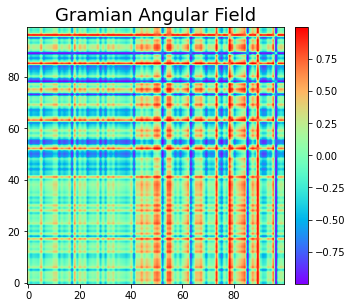

In [8]:
plt.figure(figsize=(5, 5))
plt.imshow(X_gadf[-6], cmap='rainbow', origin='lower')
plt.title('Gramian Angular Field', fontsize=18)
plt.colorbar(fraction=0.0457, pad=0.04)
plt.tight_layout()
plt.show()

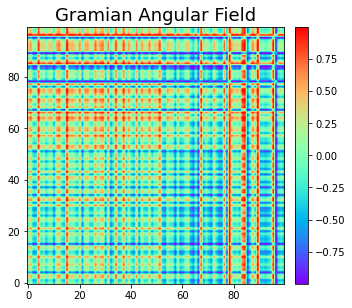

In [9]:
plt.figure(figsize=(5, 5))
plt.imshow(X_gadf[1], cmap='rainbow', origin='lower')
plt.title('Gramian Angular Field', fontsize=18)
plt.colorbar(fraction=0.0457, pad=0.04)
plt.tight_layout()
plt.show()

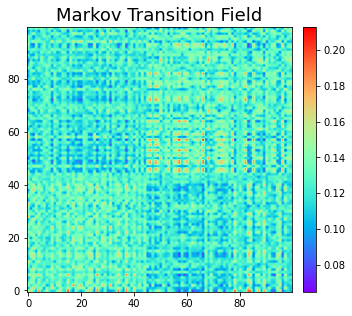

In [10]:
plt.figure(figsize=(5, 5))
plt.imshow(X_markof[2], cmap='rainbow', origin='lower')
plt.title('Markov Transition Field', fontsize=18)
plt.colorbar(fraction=0.0457, pad=0.04)
plt.tight_layout()
plt.show()

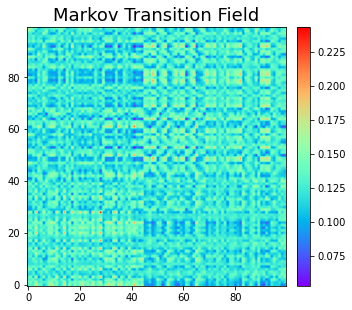

In [11]:
plt.figure(figsize=(5, 5))
plt.imshow(X_markof[-10], cmap='rainbow', origin='lower')
plt.title('Markov Transition Field', fontsize=18)
plt.colorbar(fraction=0.0457, pad=0.04)
plt.tight_layout()
plt.show()

In [12]:
import torch

In [13]:
torch.cuda.is_available()

True